In [1]:
dataset='brightkite'

In [2]:
import glob

In [3]:
import math

In [4]:
import os

In [5]:
import os.path

In [6]:
import networkx as nx

In [7]:
import numpy as np

In [8]:
import json

In [9]:
k_values = sorted([
    int(string_value)
    for string_value in os.listdir(f'detected_communities/{dataset}')
])

In [10]:
k_values_to_m_values_to_community_detection_times = {}

for k in k_values:
    m_values = sorted([
        int(string_value)
        for string_value in os.listdir(f'detected_communities/{dataset}/{k}')
    ])
    
    m_values_to_community_detection_times = {}

    for m_value in sorted(m_values):
        detected_community = nx.read_adjlist(f'detected_communities/{dataset}/{k}/{m_value}')
        if len(detected_community.nodes):
            with open(f'community_detection_times/{dataset}/{k}/{m_value}', 'r') as fp:
                j = json.load(fp)
                m_values_to_community_detection_times[m_value] = np.mean(j) / 1e6
    
    k_values_to_m_values_to_community_detection_times[k] = m_values_to_community_detection_times

In [11]:
import matplotlib.pyplot as plt

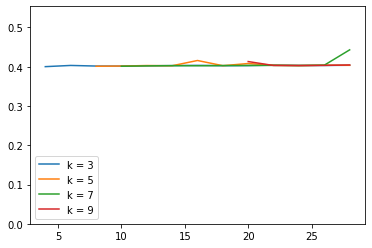

In [12]:
figure, axes=plt.subplots()

for k, m_values_to_community_detection_times in k_values_to_m_values_to_community_detection_times.items():
    axes.plot(
        m_values_to_community_detection_times.keys(),
        m_values_to_community_detection_times.values(),
        label=f'k = {k}'
    )

axes.set_ylim(
    0,
    1.25 * max(
        (max(m_values_to_community_detection_times.values()) for m_values_to_community_detection_times in k_values_to_m_values_to_community_detection_times.values())
    )
)

axes.legend()

In [13]:
figure.savefig(f'{dataset}-community_detection_times.pdf')